In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
#import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [0]:
#Reading csv files
train = pd.read_csv('gdrive/My Drive/dataset/train.csv')
test = pd.read_csv('gdrive/My Drive/dataset/test.csv')


Data Exploration.

In [5]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [0]:
sample = pd.read_csv('gdrive/My Drive/dataset/sample_submission.csv')

In [7]:
sample.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [8]:
print('Train shape :',train.shape,'Test shape :',test.shape)

Train shape : (1460, 81) Test shape : (1459, 80)


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

In [11]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [0]:
#Save the 'Id' column
train_ID = train['Id']
test_ID = test['Id']

#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

**Exploratory Data Analysis.**

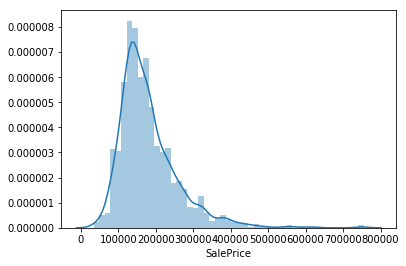

In [13]:
#Exploratory Data Analysis
sns.distplot(train['SalePrice']);

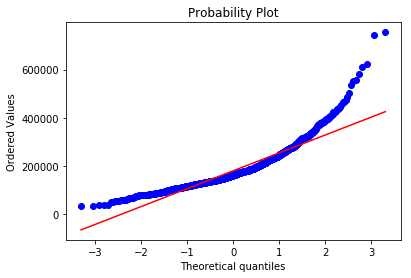

In [14]:
#Probability plot of the Target variable

fig = plt.figure()
stats.probplot(train['SalePrice'], plot=plt)
plt.show()

In [15]:
#Checking skewness in the target variable

print('SalePrice skewness :',train['SalePrice'].skew())
print('SalePrice Kurtosis :',train['SalePrice'].kurt())

SalePrice skewness : 1.8828757597682129
SalePrice Kurtosis : 6.536281860064529


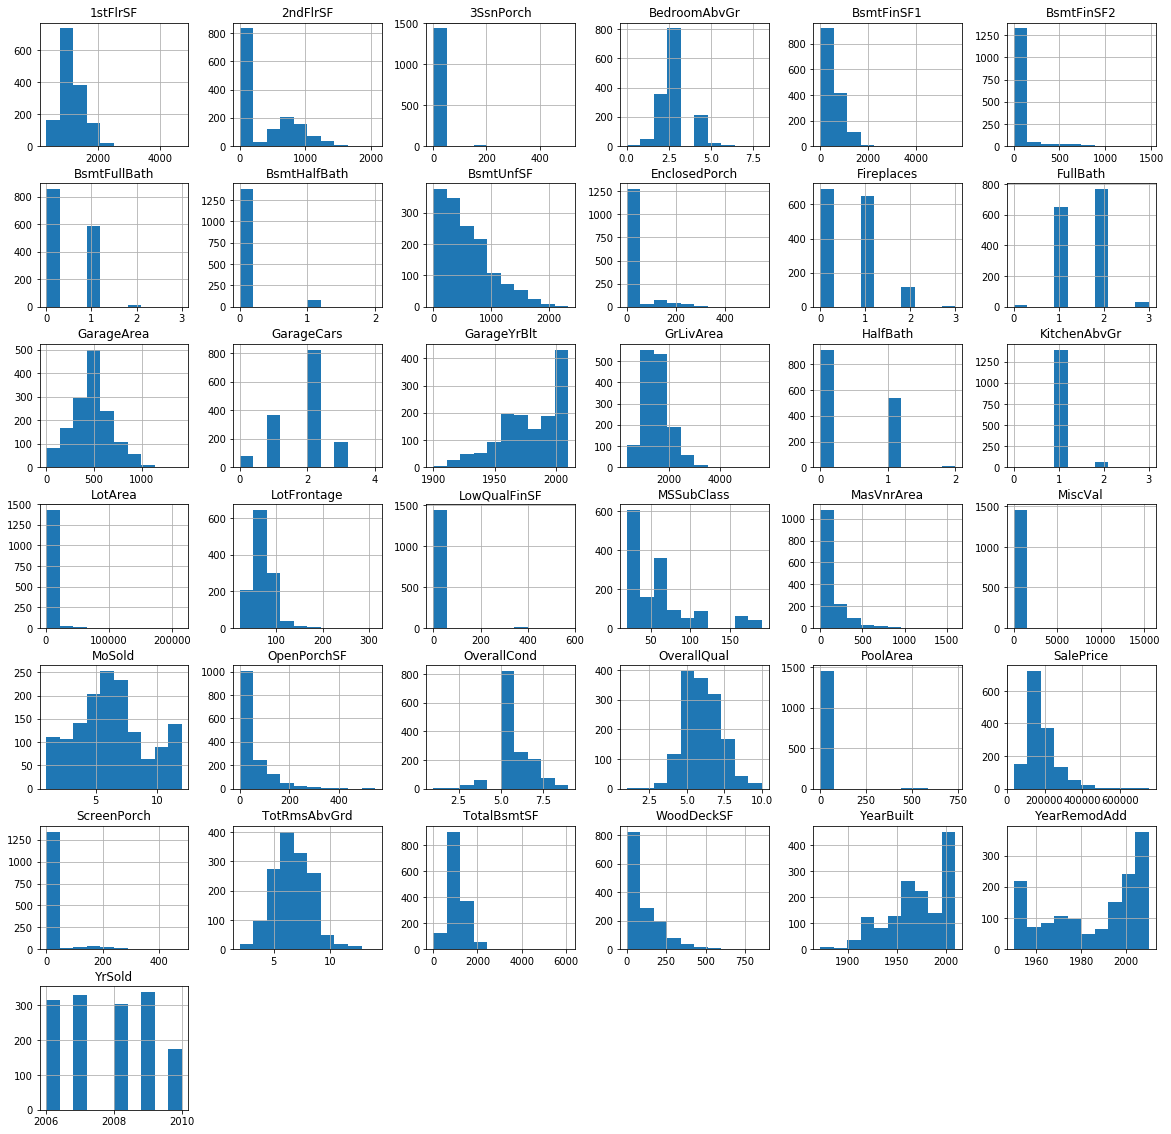

In [16]:
#Histogram of the training data

train.hist(figsize = (20,20));

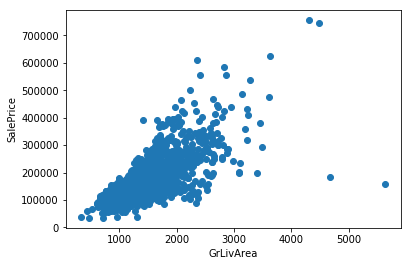

In [17]:
#checking the relationship between the variables

plt.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

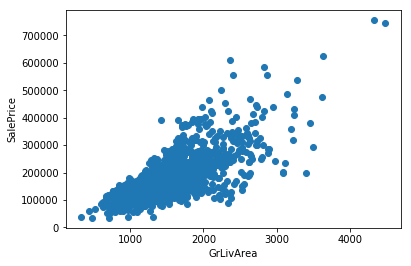

In [18]:
#Deleting outliers

train = train.drop(train[(train['GrLivArea']>4500) & (train['SalePrice']<300000)].index)
plt.scatter(train['GrLivArea'], train['SalePrice'])
plt.ylabel('SalePrice')
plt.xlabel('GrLivArea')
plt.show()

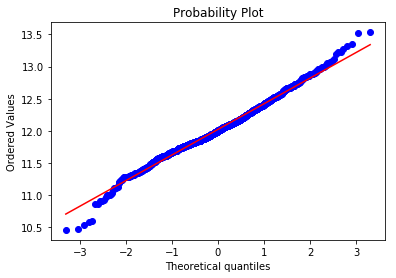

In [19]:
#The target variable is right skewed
train["SalePrice"] = np.log1p(train["SalePrice"])

fig = plt.figure()
stats.probplot(train['SalePrice'], plot=plt)
plt.show()

Skewness After the Target variable transformation. Here the skewness is reduced as compare to earlier.

In [20]:
#Skewness After the Target variable transformation. Here the skewness is reduced as compare to earlier.
print('SalePrice skewness :',train['SalePrice'].skew())
print('SalePrice Kurtosis :',train['SalePrice'].kurt())

SalePrice skewness : 0.12157976050304879
SalePrice Kurtosis : 0.8047507917418972


Heatmap plot among the continuous variable.

**Feature** **Engineering**

In [22]:
ntrain = train.shape[0]
ntest = test.shape[0]

y_train = train['SalePrice'].values

data = pd.concat((train, test)).reset_index(drop=True)
data.drop(['SalePrice'], axis=1, inplace=True)
print("shape of data :",data.shape)

shape of data : (2917, 79)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


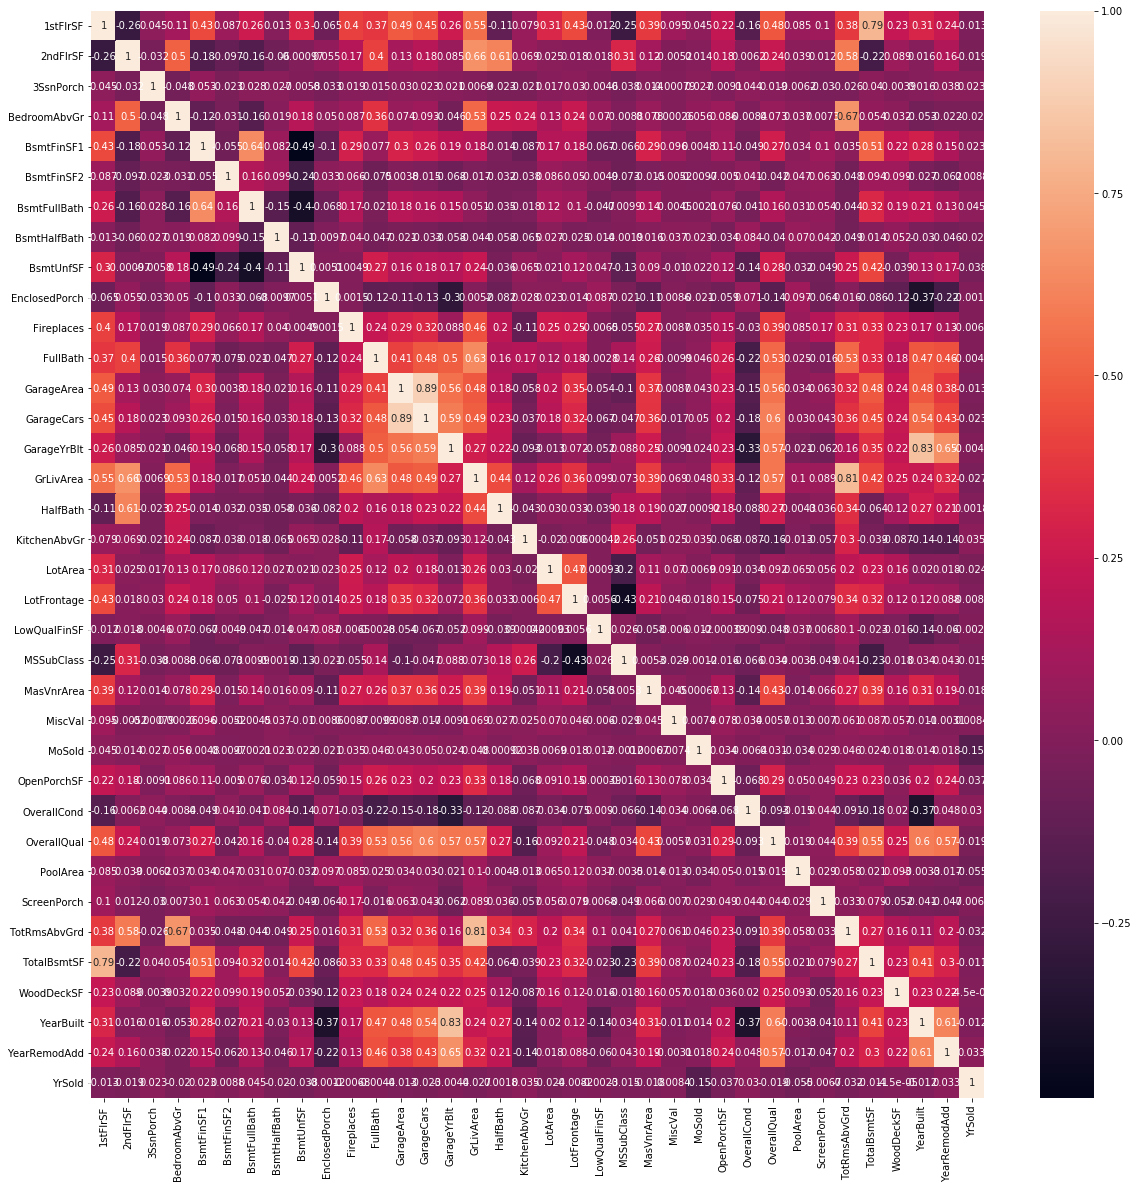

In [23]:
#Heatmap plot among the continuous variable.
plt.subplots(figsize=(20,20))
sns.heatmap(data.corr(),annot = True);

Exploring the Missing values.

In [0]:
#Exploring the missing values
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [25]:
missing_data.head(25)

,Total,Percent
PoolQC,2908,0.996915
MiscFeature,2812,0.964004
Alley,2719,0.932122
Fence,2346,0.804251
FireplaceQu,1420,0.486802
LotFrontage,486,0.166610
GarageFinish,159,0.054508
GarageQual,159,0.054508
GarageYrBlt,159,0.054508
GarageCond,159,0.054508


In [0]:
#Drop the column which having missing value greater than 156
data = data.drop((missing_data[missing_data['Total'] > 156]).index,1)

In [27]:
data.isnull().sum().sort_values(ascending = False)

BsmtCond         82
BsmtExposure     82
BsmtQual         81
BsmtFinType2     80
BsmtFinType1     79
MasVnrType       24
MasVnrArea       23
MSZoning          4
Utilities         2
Functional        2
BsmtFullBath      2
BsmtHalfBath      2
Electrical        1
GarageCars        1
Exterior1st       1
Exterior2nd       1
KitchenQual       1
BsmtUnfSF         1
GarageArea        1
TotalBsmtSF       1
BsmtFinSF2        1
BsmtFinSF1        1
SaleType          1
CentralAir        0
2ndFlrSF          0
FullBath          0
Foundation        0
Fireplaces        0
3SsnPorch         0
ExterQual         0
                 ..
GrLivArea         0
HalfBath          0
YearBuilt         0
WoodDeckSF        0
TotRmsAbvGrd      0
Street            0
ScreenPorch       0
SaleCondition     0
RoofStyle         0
RoofMatl          0
PoolArea          0
PavedDrive        0
OverallQual       0
OverallCond       0
OpenPorchSF       0
Neighborhood      0
MoSold            0
MiscVal           0
MSSubClass        0


Filling the missing values.

In [0]:
#Handling the missing values

data['Exterior1st'] = data['Exterior1st'].fillna(data['Exterior1st'].mode()[0])
data['Exterior2nd'] = data['Exterior2nd'].fillna(data['Exterior2nd'].mode()[0])
data['Electrical'] = data['Electrical'].fillna(data['Electrical'].mode()[0])
data['KitchenQual'] = data['KitchenQual'].fillna(data['KitchenQual'].mode()[0])
data["Functional"] = data["Functional"].fillna("Typ")
data['MSZoning'] = data['MSZoning'].fillna(data['MSZoning'].mode()[0])
data["MasVnrType"] = data["MasVnrType"].fillna("None")
data["MasVnrArea"] = data["MasVnrArea"].fillna(0)

In [0]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    data[col] = data[col].fillna('None')

In [0]:
#filling null values with 0.
data = data.fillna('0')

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2917 entries, 0 to 2916
Data columns (total 68 columns):
1stFlrSF         2917 non-null int64
2ndFlrSF         2917 non-null int64
3SsnPorch        2917 non-null int64
BedroomAbvGr     2917 non-null int64
BldgType         2917 non-null object
BsmtCond         2917 non-null object
BsmtExposure     2917 non-null object
BsmtFinSF1       2917 non-null object
BsmtFinSF2       2917 non-null object
BsmtFinType1     2917 non-null object
BsmtFinType2     2917 non-null object
BsmtFullBath     2917 non-null object
BsmtHalfBath     2917 non-null object
BsmtQual         2917 non-null object
BsmtUnfSF        2917 non-null object
CentralAir       2917 non-null object
Condition1       2917 non-null object
Condition2       2917 non-null object
Electrical       2917 non-null object
EnclosedPorch    2917 non-null int64
ExterCond        2917 non-null object
ExterQual        2917 non-null object
Exterior1st      2917 non-null object
Exterior2nd      2917 no

Exploring Data Stats.

In [32]:
#Data Data Statistics.

from scipy import stats
from scipy.stats import norm, skew
numeric_feats = data.dtypes[data.dtypes != "object"].index
# Check the skew of all numerical features
skewed_feats = data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,21.939672
PoolArea,17.688664
LotArea,13.109495
LowQualFinSF,12.084539
3SsnPorch,11.372080
KitchenAbvGr,4.300550
EnclosedPorch,4.002344
ScreenPorch,3.945101
MasVnrArea,2.621719
OpenPorchSF,2.529358


In [0]:
#data['MSSubClass'] = data['MSSubClass'].apply(str)
#data['OverallCond'] = data['OverallCond'].astype(str)
#data['YrSold'] = data['YrSold'].astype(str)
#data['MoSold'] = data['MoSold'].astype(str)

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2917 entries, 0 to 2916
Data columns (total 68 columns):
1stFlrSF         2917 non-null int64
2ndFlrSF         2917 non-null int64
3SsnPorch        2917 non-null int64
BedroomAbvGr     2917 non-null int64
BldgType         2917 non-null object
BsmtCond         2917 non-null object
BsmtExposure     2917 non-null object
BsmtFinSF1       2917 non-null object
BsmtFinSF2       2917 non-null object
BsmtFinType1     2917 non-null object
BsmtFinType2     2917 non-null object
BsmtFullBath     2917 non-null object
BsmtHalfBath     2917 non-null object
BsmtQual         2917 non-null object
BsmtUnfSF        2917 non-null object
CentralAir       2917 non-null object
Condition1       2917 non-null object
Condition2       2917 non-null object
Electrical       2917 non-null object
EnclosedPorch    2917 non-null int64
ExterCond        2917 non-null object
ExterQual        2917 non-null object
Exterior1st      2917 non-null object
Exterior2nd      2917 no

In [35]:
data['Utilities'].value_counts()

AllPub    2914
0            2
NoSeWa       1
Name: Utilities, dtype: int64

Converting the object into the float type.

In [0]:
#converting the object into float type.

data['BsmtFinSF2'] = data['BsmtFinSF2'].astype(float)
data['BsmtFinSF1'] = data['BsmtFinSF1'].astype(float)
data['BsmtUnfSF'] = data['BsmtUnfSF'].astype(float)
data['GarageArea'] = data['GarageArea'].astype(float)
data['TotalBsmtSF'] = data['TotalBsmtSF'].astype(float)


Label Encoding of the features which having the less degree of categorical Attributes.

In [37]:
#Label Encoding.

from sklearn.preprocessing import LabelEncoder
cols = ( 
         'HeatingQC','Utilities',
        'LotShape', 'PavedDrive', 'Street', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
#apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(data[c].values)) 
    data[c] = lbl.transform(list(data[c].values))
data.shape

(2917, 68)

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2917 entries, 0 to 2916
Data columns (total 68 columns):
1stFlrSF         2917 non-null int64
2ndFlrSF         2917 non-null int64
3SsnPorch        2917 non-null int64
BedroomAbvGr     2917 non-null int64
BldgType         2917 non-null object
BsmtCond         2917 non-null object
BsmtExposure     2917 non-null object
BsmtFinSF1       2917 non-null float64
BsmtFinSF2       2917 non-null float64
BsmtFinType1     2917 non-null object
BsmtFinType2     2917 non-null object
BsmtFullBath     2917 non-null object
BsmtHalfBath     2917 non-null object
BsmtQual         2917 non-null object
BsmtUnfSF        2917 non-null float64
CentralAir       2917 non-null int64
Condition1       2917 non-null object
Condition2       2917 non-null object
Electrical       2917 non-null object
EnclosedPorch    2917 non-null int64
ExterCond        2917 non-null object
ExterQual        2917 non-null object
Exterior1st      2917 non-null object
Exterior2nd      2917 

Exploring the skewness of the Data.

In [39]:
#Exploring the skewness among the deatures

skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    data[feat] = boxcox1p(data[feat], lam)
    

There are 26 skewed numerical features to Box Cox transform


In [0]:
data['TotalBsmtSF'] = data['TotalBsmtSF'].astype(float)

In [41]:
data['TotalBsmtSF'].values

array([ 856., 1262.,  920., ..., 1224.,  912.,  996.])

Adding the three features into one **TotalSF** because their individual contribution is not effective for model intrepretation.

In [0]:
# Adding total sqfootage feature 
data['TotalSF'] = data['TotalBsmtSF'] + data['1stFlrSF'] + data['2ndFlrSF']

In [43]:
data.shape

(2917, 69)

**One hot encoding.**

In [44]:
#one hot encoding
data = pd.get_dummies(data)
print(data.shape)

(2917, 256)


Splitting the Train and Test Data for model building.

In [0]:
#spliting the train and test set for model building
train1 = data.iloc[:ntrain,:]
test1 = data.iloc[:ntest,:]

In [46]:
train1.shape, test1.shape

((1458, 256), (1459, 256))

**Model Building.**

Random Forest Model.

In [0]:
#RF model
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(train1,y_train);# Train the model on training data

In [0]:
y_pred = rf.predict(test1)

In [49]:
len(y_train),len(y_pred)

(1458, 1459)

In [0]:
y_pred = y_pred[:ntrain]

In [56]:
len(y_pred)

1458

RMSE log error.

In [58]:
#EMSE log error
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(np.log(y_train),np.log(y_pred)))
print('Random Forest RMS log error',rms)

Random Forest RMS log error 0.004220756918532187


Random Forest RMS log error is : 0.0043758619127426705

ROC AUC SCORE.

In [0]:
#from sklearn.metrics import roc_auc_score
#roc_auc_score(y_train1,y_pred)

Confusion Matrix.

In [0]:
#from sklearn.metrics import confusion_matrix
#confusion_matrix(y_train1, y_pred)

Gradient Boosting Model.

In [61]:
from sklearn.ensemble import GradientBoostingRegressor
GBoost1 = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
GBoost1.fit(train1,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='huber', max_depth=4,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=15, min_samples_split=10,
             min_weight_fraction_leaf=0.0, n_estimators=3000,
             n_iter_no_change=None, presort='auto', random_state=5,
             subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [0]:
y_pred1 = GBoost1.predict(test1)

In [0]:
y_pred2 = y_pred1[:len(y_pred1)-1]

RMSE log error.

In [67]:
rms = sqrt(mean_squared_error(np.log(y_train),np.log(y_pred2)))
print('Gradient boosting RMS log error',rms)

Gradient boosting RMS log error 0.004534243904974037


Gradient boosting RMS log error 0.004990314137309123

Saving a copy of prediction file.

In [0]:
#Assign to sample submission

df = pd.DataFrame()
df['Id'] = test_ID
df['SalePrice'] = y_pred1
df.to_csv('gdrive/My Drive/dataset/submission_file10.csv',index = False)


Here we can see that the Random Forest Algorithm is outperformed Gradient Boosting Algorithm. The reson behind is that Ramdom Forest is automatically handles outliers and missing values up to a limit and predicts with better Accuracy.

In [0]:
#Here we can see that the Random Forest Algorithm is outperformed Gradient Boosting Algorithm.
#The reson behind is that Ramdom Forest is automatically handles outliers and missing values up to a limit and predicts 
#with better Accuracy.